In [88]:
import os
import sys
import urllib.request
import json
import re
import pandas as pd
client_id = "4FdY0qL5azIJ4BXVjUal"
client_secret = "Ylgg4Oh_FN"
search = input('검색어를 입력하세요 : ')

blog_data = pd.DataFrame()

encText = urllib.parse.quote(search)

title = list()
description = list()
adress = list()

for i in range(1, 1000, 100):
    try:
        url = "https://openapi.naver.com/v1/search/blog?query=" + encText + '&display=100'+'&sort=sim'+f'&start={i}' # json 결과
        # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과

        request = urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id",client_id)
        request.add_header("X-Naver-Client-Secret",client_secret)
        response = urllib.request.urlopen(request)
        rescode = response.getcode()

        if(rescode==200):
            response_body = response.read().decode('utf-8')
            response_body1 = json.loads(str(response_body))
            for i in response_body1['items']:
                hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
                title.append(hangul.sub(r'', i['title']))
                description.append(hangul.sub(r'', i['description']))
                adress.append(i['link'])
        else:
            print("Error Code:" + rescode)

    except:
        print('Error')

blog_data['title'] = title
blog_data['description']= description
blog_data['adress'] = adress

blog_data.to_csv('data/{0}블로그 데이터.txt'.format(search), mode='a', header=True, index=True)



검색어를 입력하세요 : 세븐일레븐+환경


In [2]:
import os
import sys
import urllib.request
import json
import re
import pandas as pd

In [13]:
import konlpy
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def get_tags(text, ntags=50): #상위 50개 출력
    spliter = Okt()
    nouns = spliter.nouns(text)
    count = Counter(nouns)
    return dict(count.most_common(ntags))

def clean_str(s):
    hangul = re.compile('[^ㄱ-ㅎ|가-힣]+')
    s = hangul.sub(r' ',s)
    cp = re.compile('['
                    u'\U00010000-\U0010FFFF'
                   ']+', flags=re.UNICODE
                   )
    s = cp.sub(r'', s)
    return s.strip()

def Wordcloud(data, savename, maskname=''):
    if maskname == '':
        wc = WordCloud(font_path='font/BMDOHYEON_ttf.ttf', background_color='white', max_font_size=60, colormap='copper')
    else:
        maskimg = np.array(Image.open(maskname))
        for i in range(len(maskimg)):
            for j in range(len(maskimg[i])):
                if maskimg[i][j]== 0:
                    maskimg[i][j] = 255
        wc = WordCloud(font_path='font/BMDOHYEON_ttf.ttf', background_color='white', mask=maskimg, max_font_size=60, colormap='copper')
    wc.generate_from_frequencies(data)
    plt.figure(figsize=(10,10))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
#     wc.to_file(savename + ".png")



print(get_tags(clean_str(data)))

{'명': 32, '접종': 6, '신규': 4, '확': 4, '진자': 4, '만': 4, '환자': 3, '차': 3, '완료': 3, '일': 2, '시': 2, '국내': 2, '코로나': 2, '수도권': 2, '를': 2, '입국': 2, '누적': 2, '비율': 2, '오늘': 1, '기준': 1, '하루': 1, '자릿수': 1, '벌써': 1, '가운데': 1, '발생': 1, '지역별': 1, '비': 1, '차지': 1, '시도': 1, '별로': 1, '서울': 1, '경기': 1, '인천': 1, '충남': 1, '대전': 1, '부산': 1, '충북': 1, '대구': 1, '경북': 1, '경남': 1, '울산': 1, '광주': 1, '강원': 1, '전북': 1, '전남': 1, '세종': 1, '제주': 1, '각': 1, '해외': 1, '유입': 1}


In [89]:

df = pd.read_csv('data/세븐일레븐+환경블로그 데이터.txt')
df

,Unnamed: 0,title,description,adress
0,0,환경을 생각하는 빨대없는 이제 질질 새는 세븐일레븐,마시는 잠깐은 커피가 새지 않으나 내려놓는 순간 무섭게 질질 새는 세븐일레븐의 환경...,https://blog.naver.com/ansangbl?Redirect=Log&l...
1,1,세븐일레븐 환경을 생각하는 빨대없는 카라멜마끼아또,서울 에프앤비에서 제조했고코리아세븐에서 판매해요 원유 커피원두는 브라질산 을 세븐...,https://blog.naver.com/blk_lg_ryan?Redirect=Lo...
2,2,세븐일레븐 즐거운 불편함 환경을 생각하는 빨대없는,세븐일레븐에 갔다가 빨대없는 커피를 보고 들고 왔어요ㅋㅋ 빨대가 없기 때문에 요렇게...,https://blog.naver.com/pknr76495?Redirect=Log&...
3,3,불편함 환경을 생각하는 빨대없는 부드러운 카페라떼세븐일레븐,오늘의 편의점 리뷰는 세븐일레븐의 신상품인 즐거운 불편함 환경을 생각하는 빨대없는 ...,http://totheno1.egloos.com/4193873
4,4,환경을 생각한다면 빨대없는 편의점커피 세븐일레븐 강추,우리 아이들에게 좋은 환경을 물려줘야 하는데 미세먼지에 코로나에 온갖 바이러스 가득...,https://blog.naver.com/daromi86?Redirect=Log&l...
...,...,...,...,...
995,995,이태리와인 혼족의제왕 몬도델비노 몬탈토 로쏘 페트와인,세븐일레븐 편의점에서 구매 가능 마침 저희 집에서 제일 가까운 편의점이 세븐일레븐이...,https://blog.naver.com/vmdew?Redirect=Log&logN...
996,996,파나소닉 물류관리 소프트웨어 개발회사 블루욘더,월마트 세븐일레븐 베스트파이 등 전 세계 약 개 기업을 고객으로 확보하고 있습니다 ...,https://blog.naver.com/sonwbsy?Redirect=Log&lo...
997,997,네이버 웹툰 작가에 이용자 데이터 제공 득 실 오늘 뉴스 중,또한 만화를 더 쉽게 그릴 수 있는 환경 제공 창작 허들을 낮추고 가 지원하며 웹툰...,https://blog.naver.com/hi_paper?Redirect=Log&l...
998,998,현재를 인식하며 변화를 의식하기 서울무용센터 박한희,있는 환경오염 이슈 속에 우리는 어제와 오늘이 다른 급변의 나날을 맞이하고 있다고 ...,https://blog.naver.com/i_sfac?Redirect=Log&log...


In [90]:
df1 = df[['description']]

In [91]:
df1

,description
0,마시는 잠깐은 커피가 새지 않으나 내려놓는 순간 무섭게 질질 새는 세븐일레븐의 환경...
1,서울 에프앤비에서 제조했고코리아세븐에서 판매해요 원유 커피원두는 브라질산 을 세븐...
2,세븐일레븐에 갔다가 빨대없는 커피를 보고 들고 왔어요ㅋㅋ 빨대가 없기 때문에 요렇게...
3,오늘의 편의점 리뷰는 세븐일레븐의 신상품인 즐거운 불편함 환경을 생각하는 빨대없는 ...
4,우리 아이들에게 좋은 환경을 물려줘야 하는데 미세먼지에 코로나에 온갖 바이러스 가득...
...,...
995,세븐일레븐 편의점에서 구매 가능 마침 저희 집에서 제일 가까운 편의점이 세븐일레븐이...
996,월마트 세븐일레븐 베스트파이 등 전 세계 약 개 기업을 고객으로 확보하고 있습니다 ...
997,또한 만화를 더 쉽게 그릴 수 있는 환경 제공 창작 허들을 낮추고 가 지원하며 웹툰...
998,있는 환경오염 이슈 속에 우리는 어제와 오늘이 다른 급변의 나날을 맞이하고 있다고 ...


In [92]:
textdata = ''
for i in df1['description']:
    textdata = textdata + ' ' +str(i)

tresult = get_tags(textdata, ntags=200)
print(tresult)

{'세븐일레븐': 1051, '환경': 704, '편의점': 369, '세븐': 186, '보틀': 179, '수': 164, '등': 148, '환경호르몬': 139, '것': 123, '생각': 112, '친환경': 104, '점': 94, '일': 93, '롯데': 92, '커피': 90, '사용': 87, '월': 86, '럭키세븐': 86, '도시락': 80, '빨대': 78, '이': 75, '년': 74, '컵': 73, '상품': 72, '오늘': 70, '위해': 68, '구매': 67, '제품': 65, '점포': 64, '운영': 63, '코리아세븐': 58, '검': 57, '때': 56, '원': 55, '일레븐': 55, '에코': 55, '개': 54, '카페': 53, '할인': 52, '가격': 51, '더': 51, '소재': 50, '판매': 48, '매장': 48, '저': 48, '위': 47, '요즘': 45, '환경보호': 44, '젠': 44, '플라스틱': 43, '내': 42, '곳': 42, '및': 42, '시': 42, '기업': 41, '이번': 41, '일본': 41, '국내': 41, '말': 41, '이용': 41, '집': 41, '앞': 40, '때문': 39, '뚜껑': 39, '라스트': 39, '행사': 39, '맛': 38, '출시': 38, '그': 37, '분': 37, '추천': 37, '음식': 36, '고객': 36, '전': 36, '중': 36, '결제': 35, '구입': 35, '나': 34, '대한': 34, '거': 34, '처': 34, '시간': 34, '또': 33, '제공': 32, '용기': 31, '사회': 31, '근무': 31, '마이': 31, '층': 31, '재활용': 30, '요': 30, '전국': 30, '통해': 30, '브랜드': 29, '물': 29, '주변': 29, '변화': 29, '현재': 29, '이마트': 29, '우리': 28, 

불용어 리스트 = ['곳', '전', '저', '전', '이'] 처럼 만들어서 제거함

# 워드 클라우드

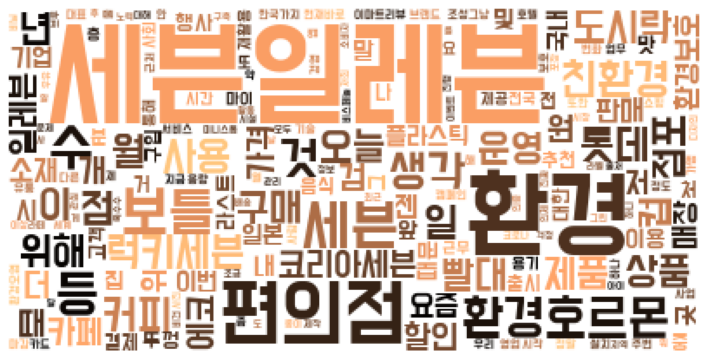

In [93]:

Wordcloud(tresult, 'CU블로그')

In [14]:
#주소 뽑아오기

import os
import sys
import urllib.request
import json
import re
import pandas as pd
client_id = "4FdY0qL5azIJ4BXVjUal"
client_secret = "Ylgg4Oh_FN"
search = input('검색어를 입력하세요 : ')

blog_data = pd.DataFrame()

encText = urllib.parse.quote(search)

adress = list()

for i in range(1, 1000, 100):
    try:
        url = "https://openapi.naver.com/v1/search/blog?query=" + encText + '&display=100'+'&sort=sim'+f'&start={i}' # json 결과
        # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과

        request = urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id",client_id)
        request.add_header("X-Naver-Client-Secret",client_secret)
        response = urllib.request.urlopen(request)
        rescode = response.getcode()

        if(rescode==200):
            response_body = response.read().decode('utf-8')
            response_body1 = json.loads(str(response_body))
            for i in response_body1['items']:
                hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
                adress.append(i['link'])
        else:
            print("Error Code:" + rescode)

    except:
        print('Error')

blog_data['adress'] = adress
blog_data.to_csv('data/{0}블로그 주소목록.txt'.format(search), mode='a', header=True, index=True)



검색어를 입력하세요 : 도라에몽


In [38]:
#주소 불러와서 블로그 내용 불러오기

import urllib.request
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import urllib
import json
import re

page = requests.get("https://m.blog.naver.com/p1ayme/222451547696")
html = page.text
soup = BeautifulSoup(html, 'lxml')
data1 = soup.find_all('div', {'class':'se-component-content'})
title = soup.find('span', {'class':'se-fs-fs32 se-ff-nanumsquare'}).text
data3 = soup.find('div', {'class':'se-main-container'}).text
contents = re.sub('[^A-Za-z0-9가-힣- -.]', '', data3)
contents = contents.replace('\r', ' ')


naverblog = [title, contents]
print(naverblog)

['아름다웠던 속초 카페 리스트', '며칠 전 친구들과 강원도 여행을 가서 미리 알아보았던 속초 카페에 다녀왔어요.카페 분위기가 너무 안락하고 오션뷰가 너무 이뻤던 곳이어서 인상깊어 소개해드려요. 1. 카페우디카페 우디강원도 속초시 영랑해안길 163 주소  강원 속초시 영랑해안길 163전화번호  010-2564-5935영업시간  매일 1000 - 2200 이날 방문한 카페우디는 영랑해안길을 따라 차로 5분 정도 거리에 있었어요.외관은 카페이름과 걸맞게 우드톤의 목재로 되어있고 커피 이외에도 다양한 음료를 팔고있어 만족스러웠던 곳이에요. 입구에는 귀여운 나무 그림이 그려진 간판이 자리하고 있었는데요.카페의 컨셉이 확실한 듯 보여서 과연 어떤 매력을 발산할지 기대가 마구 높아졌어요.  테이크아웃 하는 손님을 위해 특별히 20% 할인을 시켜준다 하더라고요.잠깐 들렀다 가야하는 손님들을 생각하는 사장님의 후한 인심을 느낄 수 있었죠. 속초 카페 안쪽으로 들어서니 깔끔하면서도 모던한 느낌이 눈에 확 들어왔어요.화이트와 우드를 조화롭게 섞어서 그런지 한눈에 봐도 쾌적함이 느껴지더라고요. 가족단위 손님이 자주오는 관광지다보니 어린이의자가 따로 준비되어 있었어요.짧은 동선으로 편하게 가져다 쓰실 수 있으니 가족단위 손님에게 유용하게 쓰이고 있더라고요. 유리 안으로 전시되어 있는 베이커리는 하나같이 영롱한 자태를 보이고 있었어요.평소 쉽게 접하지 못하는 재료들로 만들어진 베이커리들이라 맛에 대한 궁금증이 높아지더라고요. 다양한 메뉴 가운데 시원한 맥주도 포함되어 있어 눈길이 가더라고요.저는 차량을 가지고 와서 마시진 못했지만 오션뷰와 함께 즐기는 맥주를 상상하니 저도 모르게 미소가 지어졌답니다. 부착된 메뉴판을 쭉 살펴보니 음료 종류가 굉장히 다향했어요.이곳의 시그니쳐인 라떼 종류는 물론 커피와 에이드까지 맛깔난 음료들이 정말 많더라고요. 예쁜 가게를 쭉 구경하고 있는데 파릇파릇한 화분들이 모여있는 공간에 시선이 머물렀어요.아기자기하면서도 싱그러운 화분이 프레쉬함을 선사해줘 